In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
# Create a sample dataframe
df = pd.read_csv('Clean_08-06.csv')

In [2]:
# df

In [3]:
pd.set_option('display.max_columns', None)
# df

In [6]:
import statsmodels.api as sm

# Select all columns except 'Date'
X_ols = sm.add_constant(df.drop(columns=['Date', 'Price', 'Status', 'URL', 'Adresse', 'Kort adresse', 'Kvdm', 'Latitude', 'Longitude', 
                                     'Kommune', 'Type', 'Price_per_kvdm', 'Price_million', 'Year', 'Natural_log_Price', 'Natural_log_Price_per_kvdm'
                                    , 'Nearest_Metro_Distance', 'Nearest_Tog_Distance', 'Distance_to_rådhus', 'ejendom_alder', 
                                     'KælderAreal', 'Build Year', 'Ejerlejlighed', 'D_Radhus_0-1',
                                     'D_Tog_0-1', 'D_metro_0-1', 'København', 'After corona lockdown', 'ln_Distance_to_rådhus']))

# Fit OLS model
model_ols = sm.OLS(df['Natural_log_Price_per_kvdm'], X_ols)
results_ols = model_ols.fit()

# Print the regression summary
# results_ols.summary()


## Residuals

In [7]:
# # Fit OLS model
# model = sm.OLS(df['Natural_log_Price_per_kvdm'], X)
# results = model.fit()

# # Get residuals
# residuals = results.resid

# # Print the first few residuals
# # print(residuals.head())

## Pooled OLS with municipalities

In [8]:
import statsmodels.api as sm
import pandas as pd

# Assuming 'df' is your pre-loaded DataFrame with the correct columns

# Select the columns that will be used as independent variables
# Make sure to include the 'After corona lockdown' dummy variable
X = sm.add_constant(df.drop(columns=['Date', 'Price', 'Status', 'URL', 'Adresse', 'Kort adresse', 'Kvdm', 'Latitude', 'Longitude', 
                                     'Kommune', 'Type', 'Price_per_kvdm', 'Price_million', 'Year', 'Natural_log_Price', 'Natural_log_Price_per_kvdm'
                                    , 'Nearest_Metro_Distance', 'Nearest_Tog_Distance', 'Distance_to_rådhus', 'ejendom_alder', 
                                     'KælderAreal', 'Build Year', 'Ejerlejlighed', 'D_Radhus_0-1',
                                     'D_Tog_0-1', 'D_metro_0-1', 'København', 'ln_Distance_to_rådhus']))

########################################################################################

# denne video er god til at forstå pooled OLS
# https://www.youtube.com/watch?v=CwcNyXDvznE&ab_channel=BenLambert


# List of municipalities and property types
municipalities = [
    'København', 'Albertslund', 'Ballerup', 'Brøndby', 'Frederiksberg', 'Furesø',
    'Gentofte', 'Gladsaxe', 'Glostrup', 'Greve', 'Herlev',
    'Hvidovre', 'Ishøj', 'Lyngby-Taarbak', 'Rudersdal', 'Rødovre',
    'Tarnby', 'Vallensbak'
]

# Add interaction terms for each municipality with the 'After corona lockdown' dummy
for mun in municipalities:
    X[f'{mun}_ld_int'] = df[mun] * df['After corona lockdown']
#########################################################################################

# Assume 'df' is your main DataFrame and 'X' is the DataFrame you're preparing for regression or analysis
# 'After corona lockdown' should be a binary variable (0 or 1) already present in df

X['D_metro_0-1_ld_int'] = df['D_metro_0-1'] * df['After corona lockdown']
X['D_metro_1-2_ld_int'] = df['D_metro_1-2'] * df['After corona lockdown']
X['D_metro_2-3_ld_int'] = df['D_metro_2-3'] * df['After corona lockdown']
X['D_metro_3_plus_ld_int'] = df['D_metro_3_plus'] * df['After corona lockdown']

X['D_Tog_0-1_ld_int'] = df['D_Tog_0-1'] * df['After corona lockdown']
X['D_Tog_1-3_ld_int'] = df['D_Tog_1-3'] * df['After corona lockdown']
X['D_Tog_3-6_ld_int'] = df['D_Tog_3-6'] * df['After corona lockdown']
X['D_Tog_6_plus_ld_int'] = df['D_Tog_6_plus'] * df['After corona lockdown']

X['D_Radhus_0-1_ld_int'] = df['D_Radhus_1-5'] * df['After corona lockdown']
X['D_Radhus_1-5_ld_int'] = df['D_Radhus_1-5'] * df['After corona lockdown']
X['D_Radhus_5-10_ld_int'] = df['D_Radhus_5-10'] * df['After corona lockdown']
X['D_Radhus_10_plus_ld_int'] = df['D_Radhus_10_plus'] * df['After corona lockdown']


X['Værelser_ld_int'] = df['Værelser'] * df['After corona lockdown']
X['Toiletter_ld_int'] = df['Toiletter'] * df['After corona lockdown']

X['Ejerlejlighed_ld_int'] = df['Ejerlejlighed'] * df['After corona lockdown']
X['Villa_ld_int'] = df['Villa'] * df['After corona lockdown']
X['Rækkehus_ld_int'] = df['Rækkehus'] * df['After corona lockdown']


X = sm.add_constant(X)

# Define the dependent variable from the DataFrame
y = df['Natural_log_Price_per_kvdm']

# Fit the OLS model with robust covariance (HC3)
model = sm.OLS(y, X).fit(cov_type='HC3')

# Print the regression summary to output
print(model.summary())

                                OLS Regression Results                                
Dep. Variable:     Natural_log_Price_per_kvdm   R-squared:                       0.536
Model:                                    OLS   Adj. R-squared:                  0.536
Method:                         Least Squares   F-statistic:                     2194.
Date:                        Sun, 09 Jun 2024   Prob (F-statistic):               0.00
Time:                                13:24:07   Log-Likelihood:                -5897.3
No. Observations:                      118601   AIC:                         1.195e+04
Df Residuals:                          118525   BIC:                         1.268e+04
Df Model:                                  75                                         
Covariance Type:                          HC3                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

C:\Users\jtami\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 80, but rank is 75
  warnings.warn('covariance of constraints does not have full '


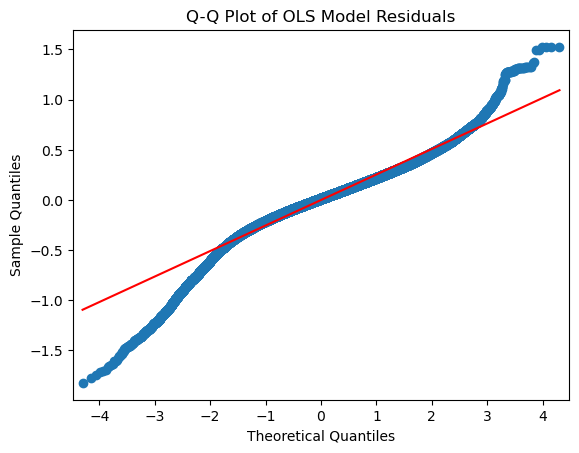

In [9]:
import matplotlib.pyplot as plt
# Generate the Q-Q plot
sm.qqplot(model.resid, line='s')
plt.title('Q-Q Plot of OLS Model Residuals')
plt.show()

In [10]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Plotting residuals
# sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True)
# plt.xlabel('Fitted values')
# plt.ylabel('Residuals')
# plt.title('Residuals vs. Fitted')
# plt.show()

# # Histogram of residuals
# plt.hist(model.resid, bins=30)
# plt.title('Histogram of Residuals')
# plt.show()


In [11]:
import statsmodels.stats.api as sms
# Perform the Breusch-Pagan test
test = sms.het_breuschpagan(model.resid, model.model.exog)

# The test returns 4 values: Lagrange multiplier statistic, p-value, f-value, and f p-value
lm_statistic = test[0]
lm_pvalue = test[1]
fvalue = test[2]
f_pvalue = test[3]

# Interpretation
significance_level = 0.05

print('Breusch-Pagan Test Results:')
print(f'Lagrange Multiplier statistic: {lm_statistic}')
print(f'p-value: {lm_pvalue}')
print(f'f-value: {fvalue}')
print(f'f p-value: {f_pvalue}')

if lm_pvalue < significance_level:
    print(f'The p-value ({lm_pvalue}) is less than the significance level ({significance_level}).')
    print('There is evidence of heteroscedasticity.')
else:
    print(f'The p-value ({lm_pvalue}) is greater than the significance level ({significance_level}).')
    print('There is no evidence of heteroscedasticity.')

Breusch-Pagan Test Results:
Lagrange Multiplier statistic: 7157.188179458529
p-value: 0.0
f-value: 101.49278697637664
f p-value: 0.0
The p-value (0.0) is less than the significance level (0.05).
There is evidence of heteroscedasticity.


## Refit the Model with Significant Variables Only

In [12]:
# Get the summary table as a DataFrame
results_summary = model.summary2().tables[1]  # Use summary2 for easier DataFrame handling

# Filter out significant variables based on p-value threshold
significant_vars = results_summary[results_summary['P>|z|'] <= 0.05].index.tolist()

# Ensure 'const' is included for the intercept, if it was significant
if 'const' not in significant_vars and 'const' in X.columns:
    significant_vars.insert(0, 'const')

# Subset the original DataFrame X to include only significant variables
X_significant = X[significant_vars]

# Fit the model again with only significant variables
model_filter = sm.OLS(y, X_significant).fit(cov_type='HC3')

# View the summary of the new model
print(model_filter.summary())

                                OLS Regression Results                                
Dep. Variable:     Natural_log_Price_per_kvdm   R-squared:                       0.536
Model:                                    OLS   Adj. R-squared:                  0.536
Method:                         Least Squares   F-statistic:                     2483.
Date:                        Sun, 09 Jun 2024   Prob (F-statistic):               0.00
Time:                                13:24:10   Log-Likelihood:                -5902.3
No. Observations:                      118601   AIC:                         1.194e+04
Df Residuals:                          118534   BIC:                         1.259e+04
Df Model:                                  66                                         
Covariance Type:                          HC3                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------

C:\Users\jtami\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 67, but rank is 66
  warnings.warn('covariance of constraints does not have full '


## Perform the Likelihood Ratio Test

In [9]:
from scipy import stats

# Log-likelihood values
ll_full = model.llf
ll_reduced = model_filter.llf

# Number of parameters in each model
df_full = model.df_model + 1  # +1 to include the intercept
df_reduced = model_filter.df_model + 1  # +1 to include the intercept

# Likelihood ratio test statistic
lr_stat = -2 * (ll_reduced - ll_full)

# Degrees of freedom
df_diff = df_full - df_reduced

# p-value from the chi-squared distribution
p_value = stats.chi2.sf(lr_stat, df_diff)

print(f'Likelihood Ratio Test Statistic: {lr_stat}')
print(f'p-value: {p_value}')

# vi forkaster null-hypotesen og vi accepterer den alternative hypotese.
# Alternative Hypothesis (H₁): The full model is correct, meaning the excluded predictors do significantly contribute to the model

Likelihood Ratio Test Statistic: 9.926488514407538
p-value: 0.3564691408949248


## Pooled OLS without municipalities

In [10]:
import statsmodels.api as sm
import pandas as pd

# Assuming 'df' is your pre-loaded DataFrame with the correct columns

# Select the columns that will be used as independent variables
# Make sure to include the 'After corona lockdown' dummy variable
X_mun = sm.add_constant(df.drop(columns=['Date', 'Price', 'Status', 'URL', 'Adresse', 'Kort adresse', 'Kvdm', 'Latitude', 'Longitude', 
                                     'Kommune', 'Type', 'Price_per_kvdm', 'Price_million', 'Year', 'Natural_log_Price', 'Natural_log_Price_per_kvdm'
                                    , 'Nearest_Metro_Distance', 'Nearest_Tog_Distance', 'Distance_to_rådhus', 'ejendom_alder', 
                                     'KælderAreal', 'Build Year', 'Ejerlejlighed', 'D_Radhus_0-1',
                                     'D_Tog_0-1', 'D_metro_0-1', 'København', 'ln_Distance_to_rådhus','Albertslund', 'Ballerup', 'Brøndby', 'Frederiksberg', 'Furesø',
                                     'Gentofte', 'Gladsaxe', 'Glostrup', 'Greve', 'Herlev','Hvidovre', 'Ishøj', 'Lyngby-Taarbak', 'Rudersdal', 
                                     'Rødovre','Tarnby', 'Vallensbak']))

########################################################################################

# denne video er god til at forstå pooled OLS
# https://www.youtube.com/watch?v=CwcNyXDvznE&ab_channel=BenLambert
#########################################################################################

# Assume 'df' is your main DataFrame and 'X' is the DataFrame you're preparing for regression or analysis
# 'After corona lockdown' should be a binary variable (0 or 1) already present in df

X_mun['D_metro_0-1_ld_int'] = df['D_metro_0-1'] * df['After corona lockdown']
X_mun['D_metro_1-2_ld_int'] = df['D_metro_1-2'] * df['After corona lockdown']
X_mun['D_metro_2-3_ld_int'] = df['D_metro_2-3'] * df['After corona lockdown']
X_mun['D_metro_3_plus_ld_int'] = df['D_metro_3_plus'] * df['After corona lockdown']

X_mun['D_Tog_0-1_ld_int'] = df['D_Tog_0-1'] * df['After corona lockdown']
X_mun['D_Tog_1-3_ld_int'] = df['D_Tog_1-3'] * df['After corona lockdown']
X_mun['D_Tog_3-6_ld_int'] = df['D_Tog_3-6'] * df['After corona lockdown']
X_mun['D_Tog_6_plus_ld_int'] = df['D_Tog_6_plus'] * df['After corona lockdown']

X_mun['D_Radhus_0-1_ld_int'] = df['D_Radhus_1-5'] * df['After corona lockdown']
X_mun['D_Radhus_1-5_ld_int'] = df['D_Radhus_1-5'] * df['After corona lockdown']
X_mun['D_Radhus_5-10_ld_int'] = df['D_Radhus_5-10'] * df['After corona lockdown']
X_mun['D_Radhus_10_plus_ld_int'] = df['D_Radhus_10_plus'] * df['After corona lockdown']


X_mun['Værelser_ld_int'] = df['Værelser'] * df['After corona lockdown']
X_mun['Toiletter_ld_int'] = df['Toiletter'] * df['After corona lockdown']

X_mun['Ejerlejlighed_ld_int'] = df['Ejerlejlighed'] * df['After corona lockdown']
X_mun['Villa_ld_int'] = df['Villa'] * df['After corona lockdown']
X_mun['Rækkehus_ld_int'] = df['Rækkehus'] * df['After corona lockdown']


X_mun = sm.add_constant(X_mun)

# Define the dependent variable from the DataFrame
y_mun = df['Natural_log_Price_per_kvdm']

# Fit the OLS model with robust covariance (HC3)
model_mun = sm.OLS(y_mun, X_mun).fit(cov_type='HC3')

# Print the regression summary to output
print(model_mun.summary())


                                OLS Regression Results                                
Dep. Variable:     Natural_log_Price_per_kvdm   R-squared:                       0.434
Model:                                    OLS   Adj. R-squared:                  0.433
Method:                         Least Squares   F-statistic:                     2371.
Date:                        Sat, 08 Jun 2024   Prob (F-statistic):               0.00
Time:                                21:01:00   Log-Likelihood:                -17790.
No. Observations:                      118601   AIC:                         3.566e+04
Df Residuals:                          118559   BIC:                         3.607e+04
Df Model:                                  41                                         
Covariance Type:                          HC3                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

C:\Users\jtami\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 45, but rank is 41
  warnings.warn('covariance of constraints does not have full '


## Refit the Model with Significant Variables Only - Municipalities

In [11]:
# Get the summary table as a DataFrame
results_summary_mun = model_mun.summary2().tables[1]  # Use summary2 for easier DataFrame handling

# Filter out significant variables based on p-value threshold
significant_vars_mun = results_summary_mun[results_summary_mun['P>|z|'] <= 0.05].index.tolist()

# Ensure 'const' is included for the intercept, if it was significant
if 'const' not in significant_vars_mun and 'const' in X_mun.columns:
    significant_vars_mun.insert(0, 'const')

# Subset the original DataFrame X to include only significant variables
X_significant_mun = X[significant_vars_mun]

# Fit the model again with only significant variables
model_filter_mun = sm.OLS(y_mun, X_significant_mun).fit(cov_type='HC3')

# View the summary of the new model
print(model_filter_mun.summary())

                                OLS Regression Results                                
Dep. Variable:     Natural_log_Price_per_kvdm   R-squared:                       0.434
Model:                                    OLS   Adj. R-squared:                  0.433
Method:                         Least Squares   F-statistic:                     2491.
Date:                        Sat, 08 Jun 2024   Prob (F-statistic):               0.00
Time:                                21:01:03   Log-Likelihood:                -17790.
No. Observations:                      118601   AIC:                         3.566e+04
Df Residuals:                          118561   BIC:                         3.605e+04
Df Model:                                  39                                         
Covariance Type:                          HC3                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

C:\Users\jtami\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 41, but rank is 39
  warnings.warn('covariance of constraints does not have full '


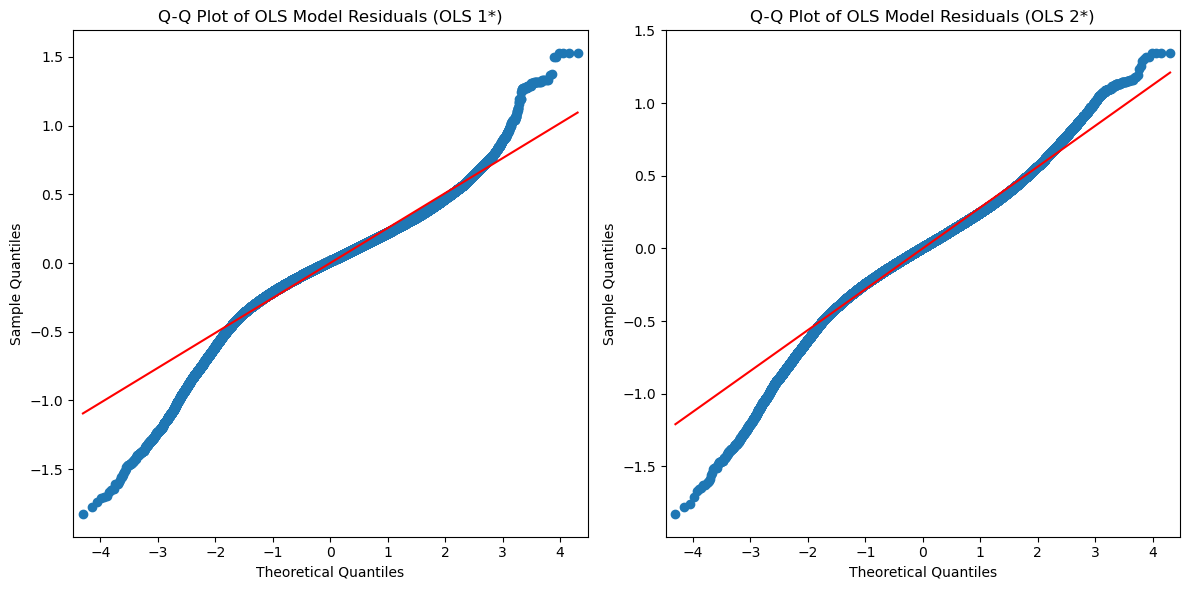

In [12]:
# Plotting Q-Q plots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Q-Q plot for OLS 1
sm.qqplot(model_filter.resid, line='s', ax=axes[0])
axes[0].set_title('Q-Q Plot of OLS Model Residuals (OLS 1*)')

# Q-Q plot for OLS 2*
sm.qqplot(model_filter_mun.resid, line='s', ax=axes[1])
axes[1].set_title('Q-Q Plot of OLS Model Residuals (OLS 2*)')

plt.tight_layout()
plt.show()

In [13]:
import statsmodels.stats.api as sms
# Perform the Breusch-Pagan test
test = sms.het_breuschpagan(model_filter_mun.resid, model_filter_mun.model.exog)

# The test returns 4 values: Lagrange multiplier statistic, p-value, f-value, and f p-value
lm_statistic = test[0]
lm_pvalue = test[1]
fvalue = test[2]
f_pvalue = test[3]

# Interpretation
significance_level = 0.05

print('Breusch-Pagan Test Results:')
print(f'Lagrange Multiplier statistic: {lm_statistic}')
print(f'p-value: {lm_pvalue}')
print(f'f-value: {fvalue}')
print(f'f p-value: {f_pvalue}')

if lm_pvalue < significance_level:
    print(f'The p-value ({lm_pvalue}) is less than the significance level ({significance_level}).')
    print('There is evidence of heteroscedasticity.')
else:
    print(f'The p-value ({lm_pvalue}) is greater than the significance level ({significance_level}).')
    print('There is no evidence of heteroscedasticity.')

Breusch-Pagan Test Results:
Lagrange Multiplier statistic: 5753.461659135019
p-value: 0.0
f-value: 154.9938193210419
f p-value: 0.0
The p-value (0.0) is less than the significance level (0.05).
There is evidence of heteroscedasticity.


In [14]:
from scipy import stats

# Log-likelihood values
ll_full = model_mun.llf
ll_reduced = model_filter_mun.llf

# Number of parameters in each model
df_full = model_mun.df_model + 1  # +1 to include the intercept
df_reduced = model_filter_mun.df_model + 1  # +1 to include the intercept

# Likelihood ratio test statistic
lr_stat_mun = -2 * (ll_reduced - ll_full)

# Degrees of freedom
df_diff_mun = df_full - df_reduced

# p-value from the chi-squared distribution
p_value_mun = stats.chi2.sf(lr_stat_mun, df_diff_mun)

print(f'Likelihood Ratio Test Statistic: {lr_stat_mun}')
print(f'p-value: {p_value_mun}')

# Fail to reject the null hypothesis. There is insufficient evidence to conclude that the full model fits the data better than the reduced model, 
# suggesting that the excluded predictors do not significantly contribute to the model.

# Null Hypothesis (H₀): The reduced model is correct, meaning the excluded predictors (those removed from the full model) do not significantly 
# contribute to the model.

Likelihood Ratio Test Statistic: 0.5222418205812573
p-value: 0.7701877903554791


## Model selection

In [15]:
# Calculate log-likelihoods
logL_null = model_filter_mun.llf
logL_alt = model_filter.llf

# Likelihood ratio test statistic
LR_stat = -2 * (logL_null - logL_alt)

# Degrees of freedom (difference in the number of parameters)
df = model.df_model - model_filter_mun.df_model

# p-value
p_value = stats.chi2.sf(LR_stat, df)

# Results
print(f"Log-Likelihood of Null Model: {logL_null}")
print(f"Log-Likelihood of Alternative Model: {logL_alt}")
print(f"Likelihood Ratio Test Statistic: {LR_stat}")
print(f"Degrees of Freedom: {df}")
print(f"p-value: {p_value}")

# vi beholder vores helt store model med kom og alle variable.

Log-Likelihood of Null Model: -17790.153671082386
Log-Likelihood of Alternative Model: -5902.2871509809775
Likelihood Ratio Test Statistic: 23775.733040202816
Degrees of Freedom: 36.0
p-value: 0.0


In [16]:
import statsmodels.api as sm
from statsmodels.nonparametric.kernel_regression import KernelReg
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.nonparametric.kernel_regression import KernelReg
import matplotlib.pyplot as plt
import numpy as np

## Nadaraya - Watson

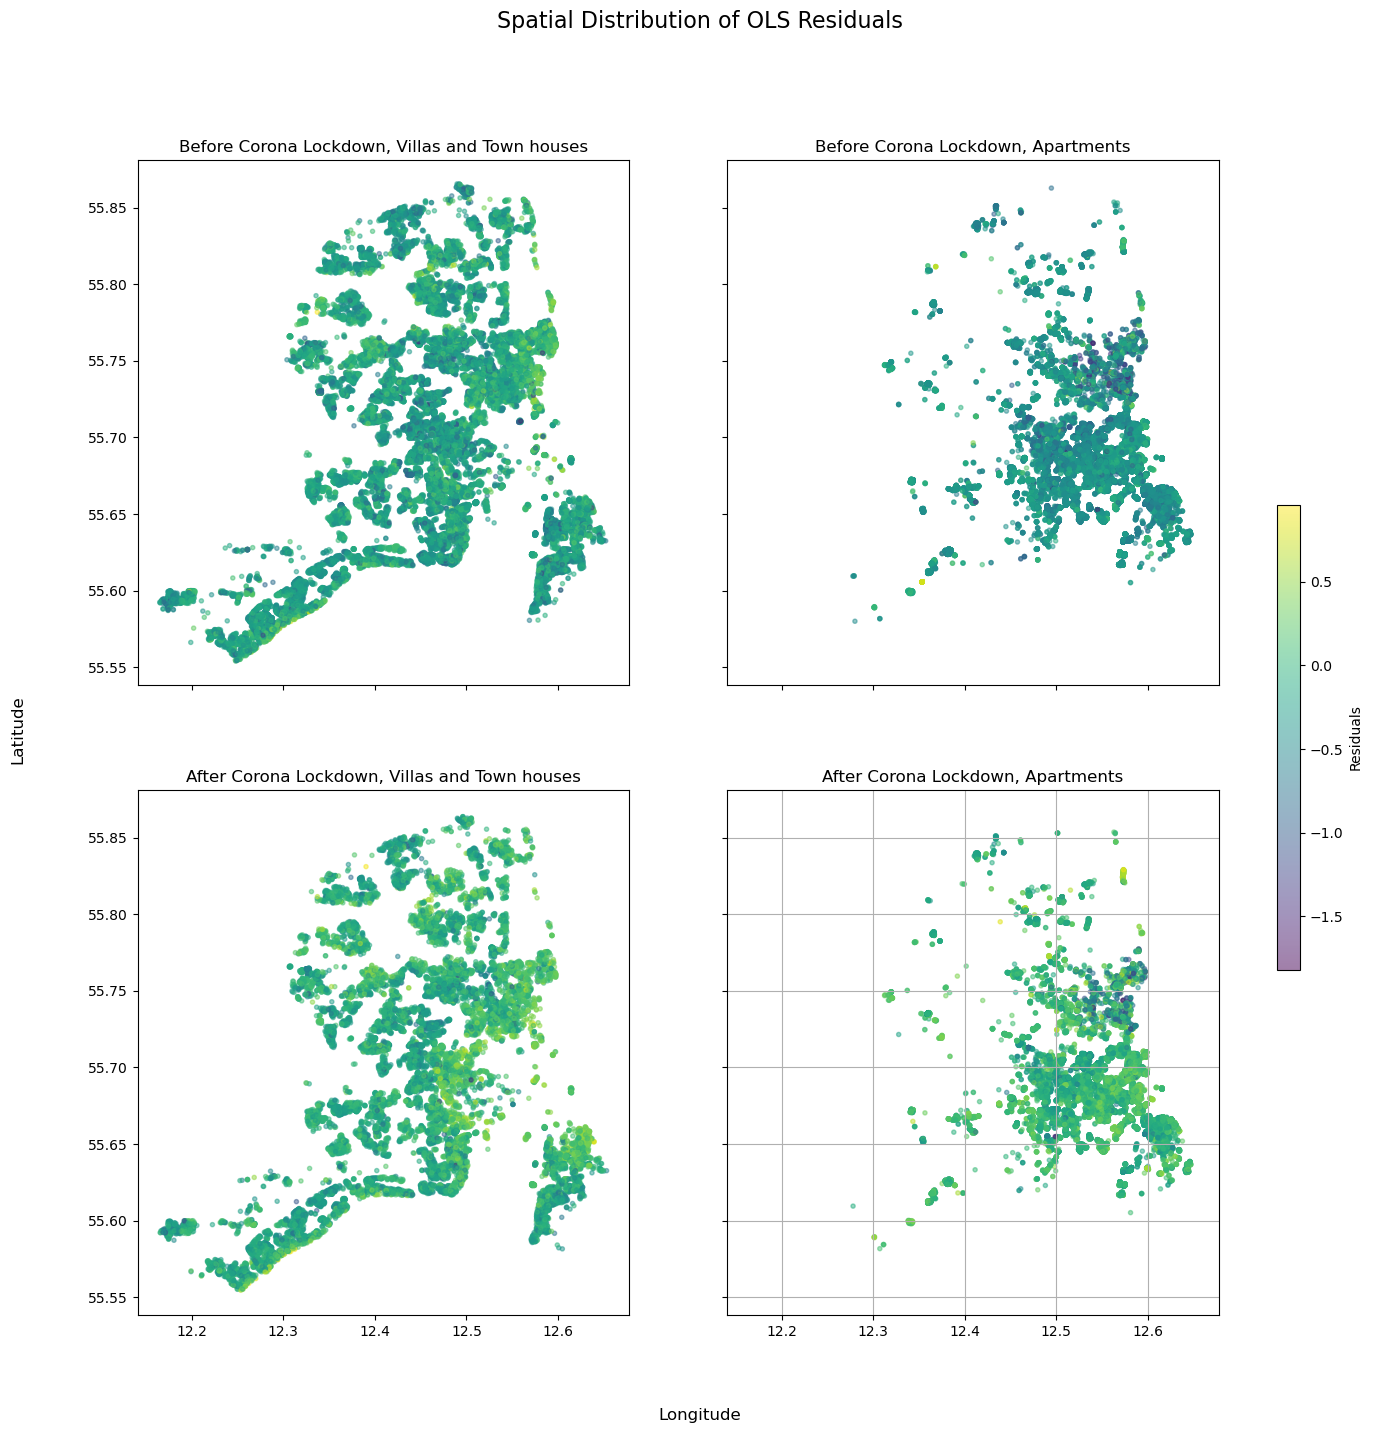

In [8]:
# Assuming df is your DataFrame and results_ols is your fitted OLS model from statsmodels
df['residuals'] = results_ols.resid

# Split the DataFrame into four parts
df_before_ejerlejlighed_0 = df[(df["After corona lockdown"] == 0) & (df["Ejerlejlighed"] == 0)]
df_before_ejerlejlighed_1 = df[(df["After corona lockdown"] == 0) & (df["Ejerlejlighed"] == 1)]
df_after_ejerlejlighed_0 = df[(df["After corona lockdown"] == 1) & (df["Ejerlejlighed"] == 0)]
df_after_ejerlejlighed_1 = df[(df["After corona lockdown"] == 1) & (df["Ejerlejlighed"] == 1)]

# Plot setup
fig, axs = plt.subplots(2, 2, figsize=(15, 15), sharex=True, sharey=True)

# Plot each subset
scatter1 = axs[0, 0].scatter(df_before_ejerlejlighed_0['Longitude'], df_before_ejerlejlighed_0['Latitude'], c=df_before_ejerlejlighed_0['residuals'], cmap='viridis', alpha=0.5, marker='.')
axs[0, 0].set_title('Before Corona Lockdown, Villas and Town houses')

scatter2 = axs[0, 1].scatter(df_before_ejerlejlighed_1['Longitude'], df_before_ejerlejlighed_1['Latitude'], c=df_before_ejerlejlighed_1['residuals'], cmap='viridis', alpha=0.5, marker='.')
axs[0, 1].set_title('Before Corona Lockdown, Apartments')

scatter3 = axs[1, 0].scatter(df_after_ejerlejlighed_0['Longitude'], df_after_ejerlejlighed_0['Latitude'], c=df_after_ejerlejlighed_0['residuals'], cmap='viridis', alpha=0.5, marker='.')
axs[1, 0].set_title('After Corona Lockdown, Villas and Town houses')

scatter4 = axs[1, 1].scatter(df_after_ejerlejlighed_1['Longitude'], df_after_ejerlejlighed_1['Latitude'], c=df_after_ejerlejlighed_1['residuals'], cmap='viridis', alpha=0.5, marker='.')
axs[1, 1].set_title('After Corona Lockdown, Apartments')

# Common labels
fig.suptitle('Spatial Distribution of OLS Residuals', fontsize=16)
fig.text(0.5, 0.04, 'Longitude', ha='center', fontsize=12)
fig.text(0.04, 0.5, 'Latitude', va='center', rotation='vertical', fontsize=12)

# Add colorbar
cbar = fig.colorbar(scatter4, ax=axs, orientation='vertical', fraction=.02)
cbar.set_label('Residuals')

plt.grid(True)
plt.show()


In [9]:
# aggregated_residuals

In [10]:
# Plot the boundary
boundary_coords = np.array([[12.19925103, 55.56430001],
       [12.15875853, 55.58919064],
       [12.15954479, 55.59452229],
       [12.17015933, 55.59985322],
       [12.20318234, 55.60007533],
       [12.21340375, 55.60562758],
       [12.21379688, 55.610957  ],
       [12.22323203, 55.61695173],
       [12.23412302, 55.6166142 ],
       [12.23575938, 55.63424765],
       [12.32112167, 55.63204551],
       [12.34392327, 55.64358389],
       [12.32190793, 55.65556246],
       [12.32465985, 55.69058982],
       [12.34667519, 55.70144637],
       [12.34706832, 55.70742726],
       [12.32583924, 55.70853473],
       [12.32819803, 55.73709666],
       [12.31836975, 55.74329339],
       [12.286133  , 55.74462113],
       [12.286133  , 55.75059541],
       [12.2975338 , 55.75590511],
       [12.29949946, 55.77934766],
       [12.34392327, 55.79570486],
       [12.34470953, 55.80189228],
       [12.32348046, 55.81470595],
       [12.35762711, 55.83035443],
       [12.35762711, 55.83632493],
       [12.36888367, 55.8419434 ],
       [12.39014608, 55.84147522],
       [12.43401282, 55.85123987],
       [12.4454127 , 55.85105704],
       [12.45648687, 55.85654175],
       [12.47765808, 55.85599331],
       [12.48873225, 55.86166011],
       [12.48905796, 55.8676916 ],
       [12.49980642, 55.87299123],
       [12.50892632, 55.8667778 ],
       [12.50892632, 55.86092896],
       [12.51837194, 55.86038058],
       [12.52846898, 55.85489641],
       [12.57374279, 55.85562768],
       [12.5831884 , 55.84996   ],
       [12.57569705, 55.81776654],
       [12.58546838, 55.81245937],
       [12.59165689, 55.81191032],
       [12.59556542, 55.799646  ],
       [12.59751968, 55.76960958],
       [12.60663959, 55.76905991],
       [12.60598817, 55.75055009],
       [12.594914  , 55.74560043],
       [12.59295973, 55.72799655],
       [12.60338248, 55.72781314],
       [12.61380523, 55.72084271],
       [12.61380523, 55.71533886],
       [12.61162704, 55.69779017],
       [12.62227371, 55.69735422],
       [12.64214207, 55.68487021],
       [12.63953639, 55.65621538],
       [12.64865629, 55.65015108],
       [12.66964429, 55.63693963],
       [12.66964429, 55.63119412],
       [12.6788049 , 55.62573512],
       [12.67829598, 55.60820369],
       [12.64521597, 55.60935353],
       [12.62536796, 55.59871621],
       [12.62485904, 55.58778838],
       [12.60348426, 55.57628212],
       [12.57193102, 55.57772059],
       [12.56175256, 55.57282959],
       [12.55106517, 55.57311731],
       [12.53070824, 55.58519977],
       [12.53019932, 55.59670341],
       [12.52097763, 55.60233897],
       [12.44606412, 55.60509895],
       [12.4362928 , 55.61061832],
       [12.42489292, 55.61117021],
       [12.4154473 , 55.6060189 ],
       [12.40502455, 55.60620288],
       [12.39425978, 55.60073275],
       [12.37211863, 55.6008749 ],
       [12.36104806, 55.59547303],
       [12.35021337, 55.59563296],
       [12.25153747, 55.54473202],
       [12.24131606, 55.55118164],
       [12.23148778, 55.55118164],
       [12.22008698, 55.55740786],
       [12.19883189, 55.55766249],
       [12.19925103, 55.56430001]])


C:\Users\jtami\AppData\Local\Temp\ipykernel_3284\3385228906.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['lon_bin'] = np.digitize(df_subset['Longitude'], lon_bins) - 1
C:\Users\jtami\AppData\Local\Temp\ipykernel_3284\3385228906.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['lat_bin'] = np.digitize(df_subset['Latitude'], lat_bins) - 1
C:\Users\jtami\AppData\Local\Temp\ipykernel_3284\3385228906.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

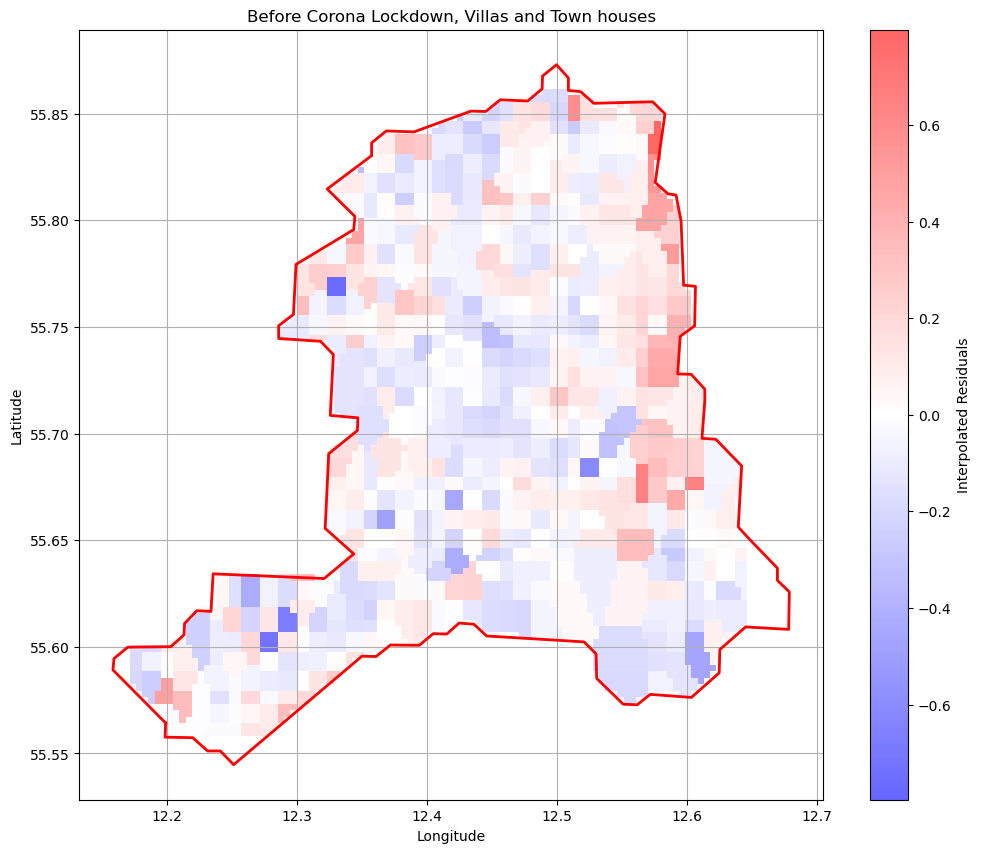

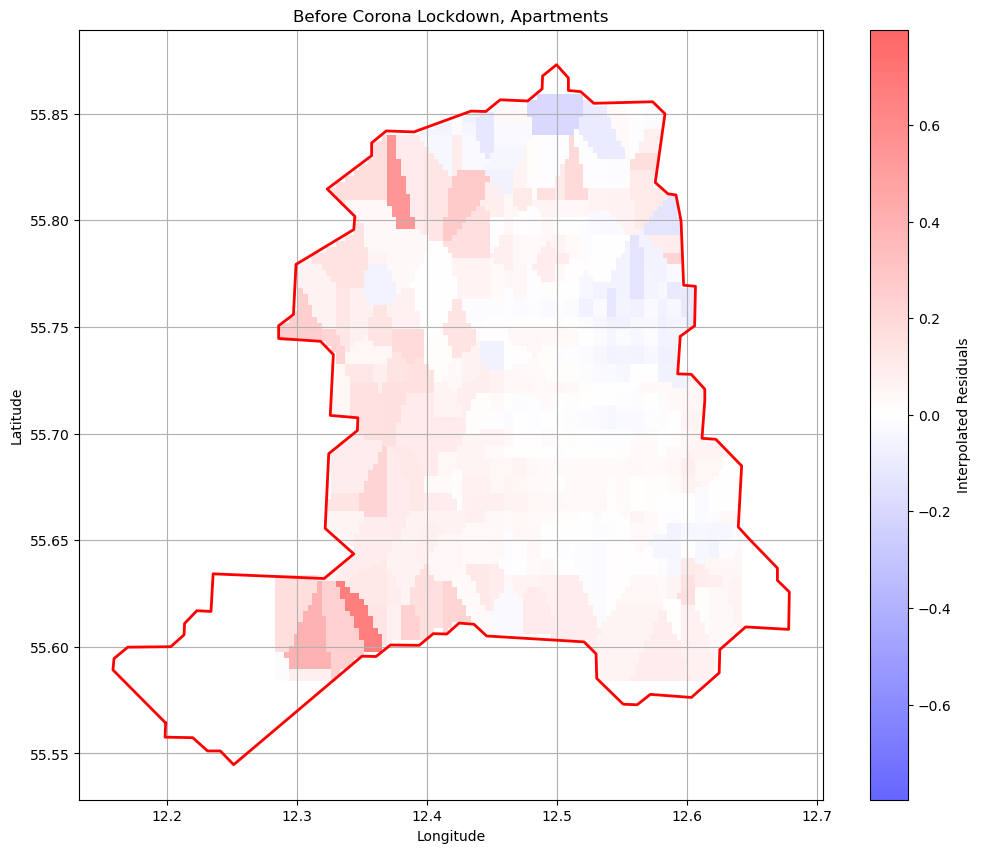

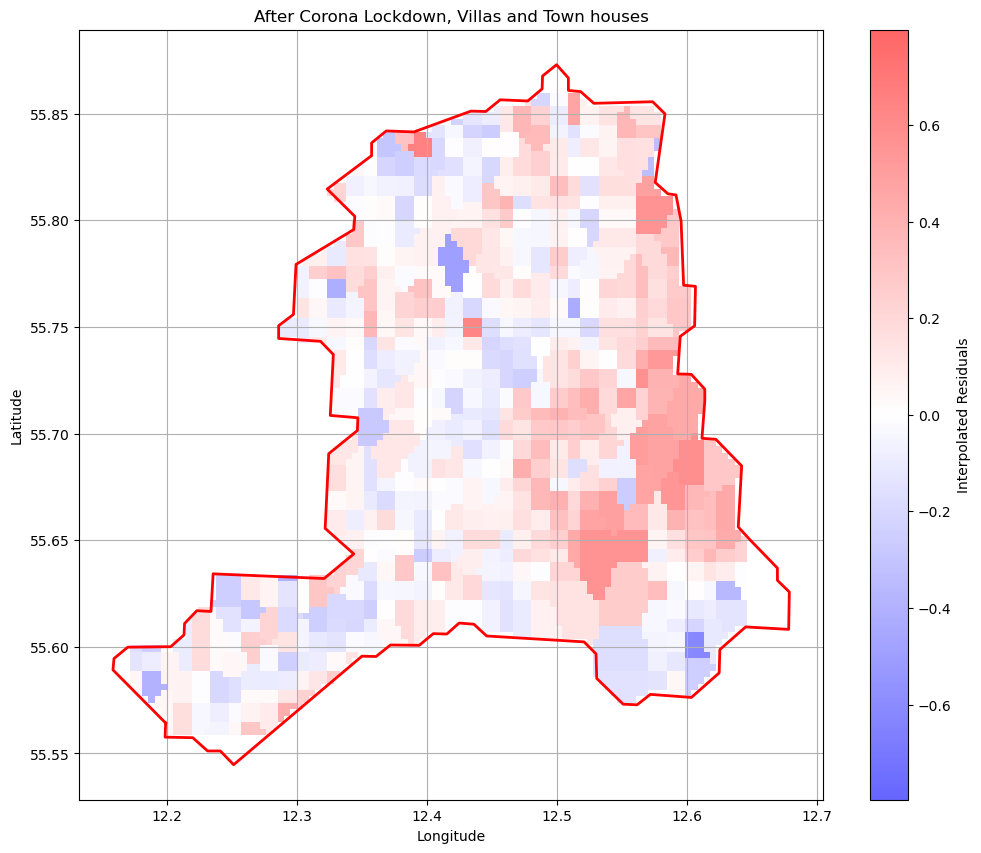

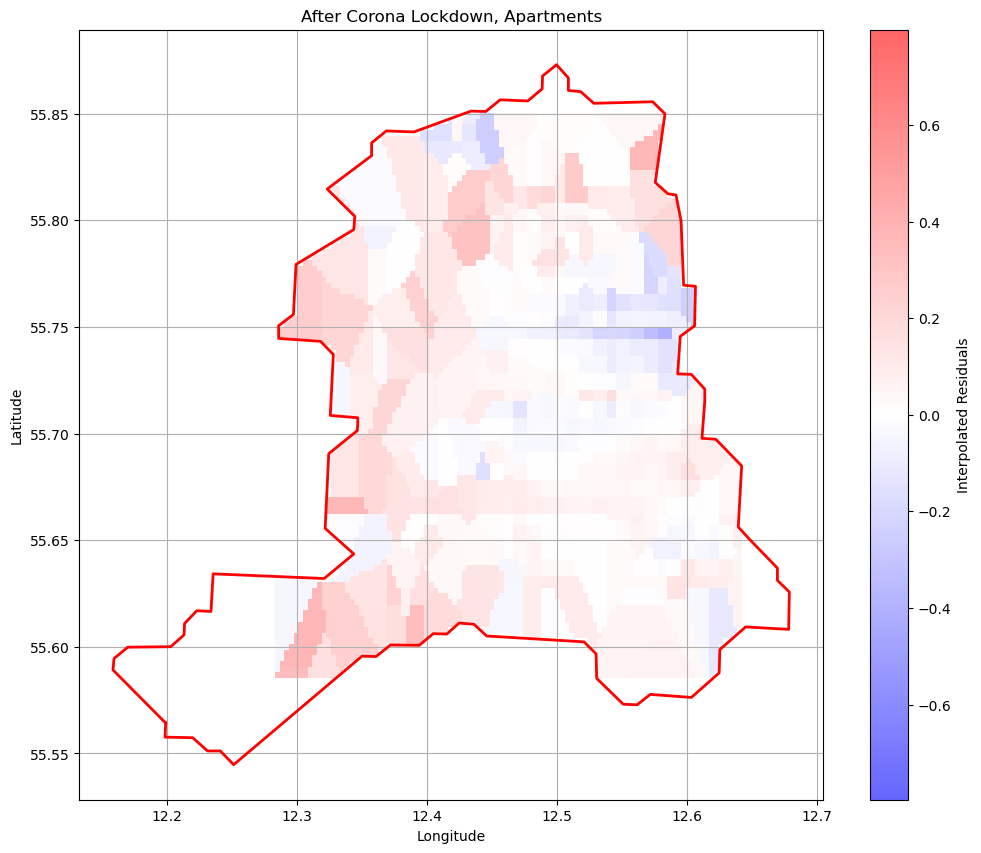

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.kernel_regression import KernelReg
from scipy.interpolate import griddata
import matplotlib.path as mpath

# Assuming df is your DataFrame and results_ols is your fitted OLS model from statsmodels
df['residuals'] = results_ols.resid

# Function to process each subset of the data
def process_and_aggregate(df_subset):
    # Binning the data
    num_cells_lon = 37
    num_cells_lat = 37
    lon_bins = np.linspace(df_subset['Longitude'].min(), df_subset['Longitude'].max(), num_cells_lon + 1)
    lat_bins = np.linspace(df_subset['Latitude'].min(), df_subset['Latitude'].max(), num_cells_lat + 1)
    df_subset['lon_bin'] = np.digitize(df_subset['Longitude'], lon_bins) - 1
    df_subset['lat_bin'] = np.digitize(df_subset['Latitude'], lat_bins) - 1
    df_subset['lon_bin'] = df_subset['lon_bin'].clip(0, num_cells_lon - 1)
    df_subset['lat_bin'] = df_subset['lat_bin'].clip(0, num_cells_lat - 1)

    # Aggregating residuals
    aggregated_residuals = df_subset.groupby(['lon_bin', 'lat_bin']).agg({
        'residuals': 'mean',
        'Longitude': 'first',
        'Latitude': 'first'
    }).reset_index()

    # Calculate the center longitude and latitude for each grid cell
    aggregated_residuals['lon_center'] = (lon_bins[aggregated_residuals['lon_bin']] + lon_bins[aggregated_residuals['lon_bin'] + 1]) / 2
    aggregated_residuals['lat_center'] = (lat_bins[aggregated_residuals['lat_bin']] + lat_bins[aggregated_residuals['lat_bin'] + 1]) / 2

    # Prepare the data for the NW analysis
    X_nw = aggregated_residuals[['lon_center', 'lat_center']].values
    y_nw = aggregated_residuals['residuals'].values

    # Fit the Nadaraya-Watson kernel regression model
    nw_model = KernelReg(endog=y_nw, exog=X_nw, var_type='uu', bw='cv_ls')
    nw_fit = nw_model.fit(X_nw)
    smoothed_residuals = nw_fit[0]

    # Add the smoothed residuals back to the aggregated_residuals DataFrame
    aggregated_residuals['smoothed_residuals'] = smoothed_residuals

    return aggregated_residuals

subsets = [
    (df[(df["After corona lockdown"] == 0) & (df["Ejerlejlighed"] == 0)], 'Before Corona Lockdown, Villas and Town houses'),
    (df[(df["After corona lockdown"] == 0) & (df["Ejerlejlighed"] == 1)], 'Before Corona Lockdown, Apartments'),
    (df[(df["After corona lockdown"] == 1) & (df["Ejerlejlighed"] == 0)], 'After Corona Lockdown, Villas and Town houses'),
    (df[(df["After corona lockdown"] == 1) & (df["Ejerlejlighed"] == 1)], 'After Corona Lockdown, Apartments')
]

# Aggregate all subsets first to find global min and max smoothed residuals
all_aggregated = []
for df_subset, title in subsets:
    aggregated_residuals = process_and_aggregate(df_subset)
    all_aggregated.append(aggregated_residuals)

# Find the global min and max smoothed residuals
global_min = min(agg['smoothed_residuals'].min() for agg in all_aggregated)
global_max = max(agg['smoothed_residuals'].max() for agg in all_aggregated)
abs_max = max(abs(global_min), abs(global_max))  # To center the color bar at 0

# Function to plot each subset of the data
def plot_subset(aggregated_residuals, title):
    # Create a fine grid for interpolation
    num_fine = 100
    fine_grid_x, fine_grid_y = np.mgrid[
        aggregated_residuals['lon_center'].min():aggregated_residuals['lon_center'].max():complex(0, num_fine),
        aggregated_residuals['lat_center'].min():aggregated_residuals['lat_center'].max():complex(0, num_fine)
    ]
    fine_grid_points = np.vstack((fine_grid_x.ravel(), fine_grid_y.ravel())).T

    # Create the mask using matplotlib's Path
    path = mpath.Path(boundary_coords)
    inside_mask = path.contains_points(fine_grid_points).reshape(fine_grid_x.shape)

    # Perform the interpolation
    interpolated_values = griddata(
        (aggregated_residuals['lon_center'], aggregated_residuals['lat_center']),
        aggregated_residuals['smoothed_residuals'],
        (fine_grid_x, fine_grid_y),
        method='nearest'  # Use 'nearest' for nearest neighbor interpolation
    )
    interpolated_values[~inside_mask] = np.nan

    # Plotting the results
    plt.figure(figsize=(12, 10))
    plt.imshow(np.rot90(np.fliplr(interpolated_values)), origin='lower', aspect='auto',
               extent=(aggregated_residuals['lon_center'].min(), aggregated_residuals['lon_center'].max(),
                       aggregated_residuals['lat_center'].min(), aggregated_residuals['lat_center'].max()),
               cmap='bwr', alpha=0.6, vmin=-abs_max, vmax=abs_max) #  viridis
    plt.colorbar(label='Interpolated Residuals')
    plt.title(title)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.plot(boundary_coords[:, 0], boundary_coords[:, 1], color='red', linewidth=2)
    plt.grid(True)
    plt.show()
###

# Loop through each subset and process/plot it
for aggregated_residuals, title in zip(all_aggregated, [title for _, title in subsets]):
    plot_subset(aggregated_residuals, title)


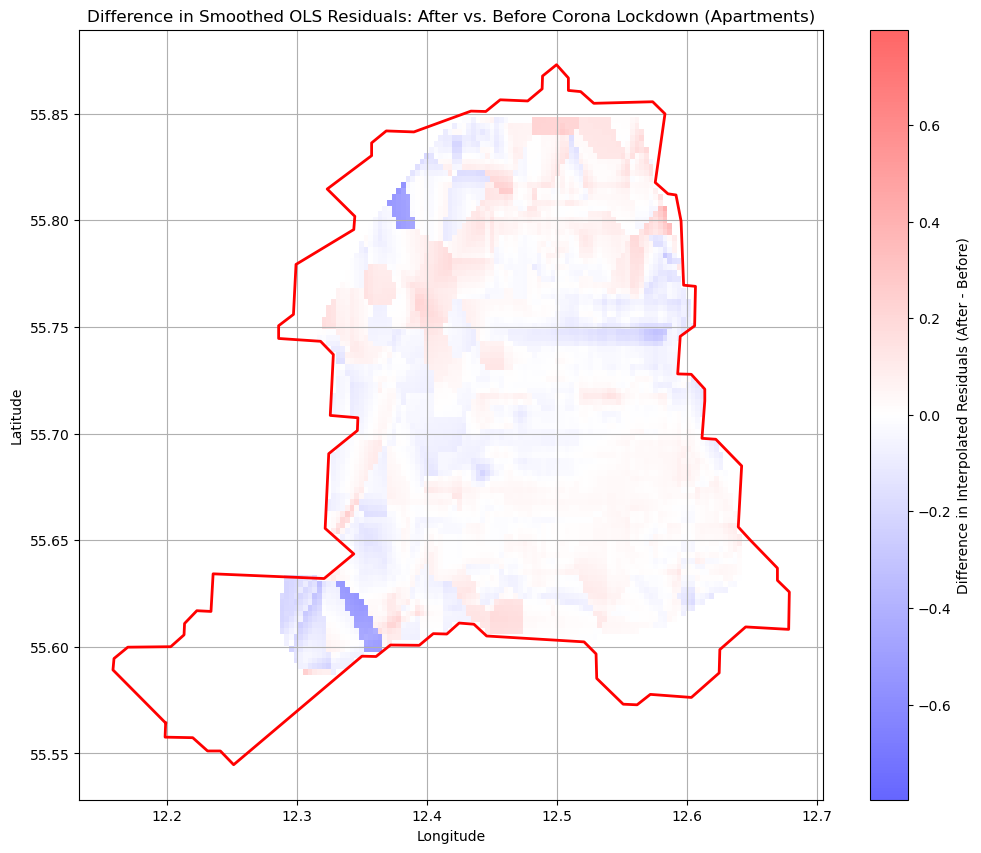

In [12]:
# Compute the difference between 'After Corona Lockdown, Apartments' and 'Before Corona Lockdown, Apartments'
before_apartments = all_aggregated[1]
after_apartments = all_aggregated[3]

# Create a common grid for interpolation
num_fine = 100
common_grid_x, common_grid_y = np.mgrid[
    min(before_apartments['lon_center'].min(), after_apartments['lon_center'].min()):max(before_apartments['lon_center'].max(), after_apartments['lon_center'].max()):complex(0, num_fine),
    min(before_apartments['lat_center'].min(), after_apartments['lat_center'].min()):max(before_apartments['lat_center'].max(), after_apartments['lat_center'].max()):complex(0, num_fine)
]
common_grid_points = np.vstack((common_grid_x.ravel(), common_grid_y.ravel())).T

# Interpolate the smoothed residuals onto the common grid
interpolated_before = griddata(
    (before_apartments['lon_center'], before_apartments['lat_center']),
    before_apartments['smoothed_residuals'],
    (common_grid_x, common_grid_y),
    method='nearest'
)

interpolated_after = griddata(
    (after_apartments['lon_center'], after_apartments['lat_center']),
    after_apartments['smoothed_residuals'],
    (common_grid_x, common_grid_y),
    method='linear'
)

# Calculate the difference
difference = interpolated_after - interpolated_before

# Mask the common grid points based on the boundary
path = mpath.Path(boundary_coords)
inside_mask = path.contains_points(common_grid_points).reshape(common_grid_x.shape)
difference[~inside_mask] = np.nan

# Plot the difference
plt.figure(figsize=(12, 10))
plt.imshow(np.rot90(np.fliplr(difference)), origin='lower', aspect='auto',
           extent=(common_grid_x.min(), common_grid_x.max(), common_grid_y.min(), common_grid_y.max()),
           cmap='bwr', alpha=0.6, vmin=-abs_max, vmax=abs_max)
plt.colorbar(label='Difference in Interpolated Residuals (After - Before)')
plt.title('Difference in Smoothed OLS Residuals: After vs. Before Corona Lockdown (Apartments)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.plot(boundary_coords[:, 0], boundary_coords[:, 1], color='red', linewidth=2)
plt.grid(True)
plt.show()


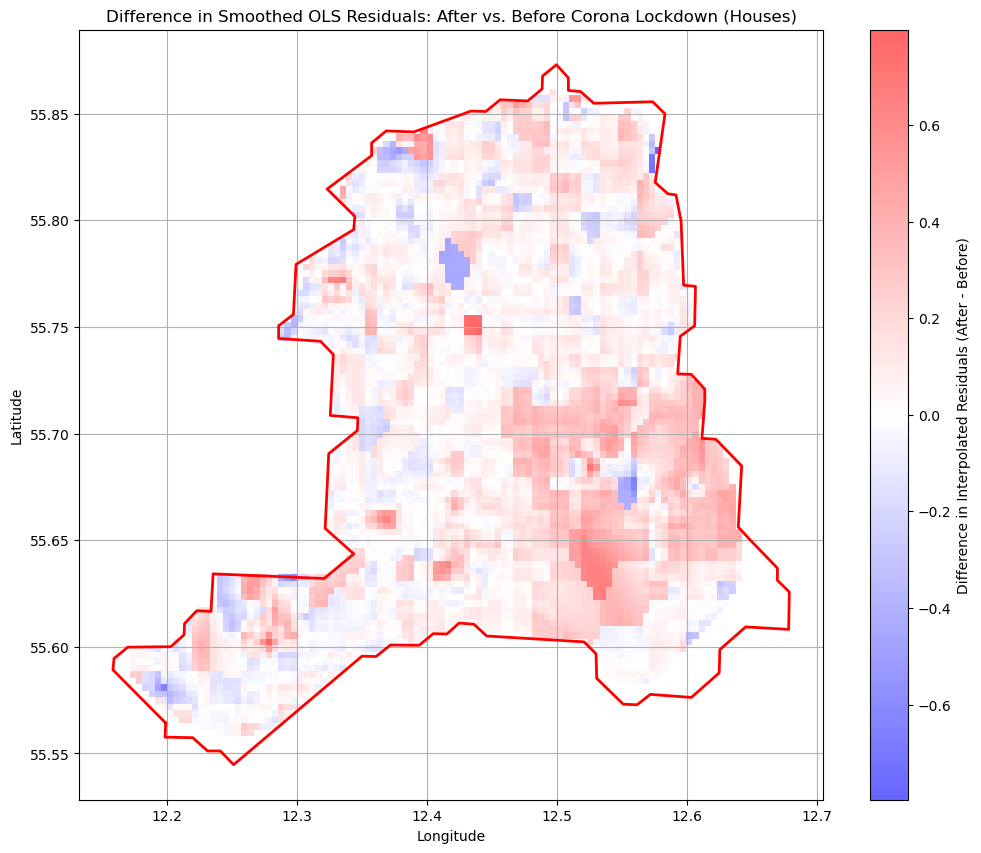

In [15]:
# Compute the difference between 'After Corona Lockdown, Apartments' and 'Before Corona Lockdown, Apartments'
before_houses = all_aggregated[0]
after_houses = all_aggregated[2]

# Create a common grid for interpolation
num_fine = 100
common_grid_x, common_grid_y = np.mgrid[
    min(before_houses['lon_center'].min(), after_houses['lon_center'].min()):max(before_houses['lon_center'].max(), after_houses['lon_center'].max()):complex(0, num_fine),
    min(before_houses['lat_center'].min(), after_houses['lat_center'].min()):max(before_houses['lat_center'].max(), after_houses['lat_center'].max()):complex(0, num_fine)
]
common_grid_points = np.vstack((common_grid_x.ravel(), common_grid_y.ravel())).T

# Interpolate the smoothed residuals onto the common grid
interpolated_before = griddata(
    (before_houses['lon_center'], before_houses['lat_center']),
    before_houses['smoothed_residuals'],
    (common_grid_x, common_grid_y),
    method='linear'
)

interpolated_after = griddata(
    (after_houses['lon_center'], after_houses['lat_center']),
    after_houses['smoothed_residuals'],
    (common_grid_x, common_grid_y),
    method='nearest'
)

# Calculate the difference
difference = interpolated_after - interpolated_before

# Mask the common grid points based on the boundary
path = mpath.Path(boundary_coords)
inside_mask = path.contains_points(common_grid_points).reshape(common_grid_x.shape)
difference[~inside_mask] = np.nan

# Plot the difference
plt.figure(figsize=(12, 10))
plt.imshow(np.rot90(np.fliplr(difference)), origin='lower', aspect='auto',
           extent=(common_grid_x.min(), common_grid_x.max(), common_grid_y.min(), common_grid_y.max()),
           cmap='bwr', alpha=0.6, vmin=-abs_max, vmax=abs_max)
plt.colorbar(label='Difference in Interpolated Residuals (After - Before)')
plt.title('Difference in Smoothed OLS Residuals: After vs. Before Corona Lockdown (Houses)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.plot(boundary_coords[:, 0], boundary_coords[:, 1], color='red', linewidth=2)
plt.grid(True)
plt.show()


In [16]:
# # Binning the data
# num_cells_lon = 90 # 120 før
# num_cells_lat = 90 # 120 før
# lon_bins = np.linspace(df['Longitude'].min(), df['Longitude'].max(), num_cells_lon + 1)
# lat_bins = np.linspace(df['Latitude'].min(), df['Latitude'].max(), num_cells_lat + 1)
# df['lon_bin'] = np.digitize(df['Longitude'], lon_bins) - 1
# df['lat_bin'] = np.digitize(df['Latitude'], lat_bins) - 1
# df['lon_bin'] = df['lon_bin'].clip(0, num_cells_lon - 1)
# df['lat_bin'] = df['lat_bin'].clip(0, num_cells_lat - 1)

# # Aggregating residuals
# aggregated_residuals = df.groupby(['lon_bin', 'lat_bin'])['residuals'].mean().reset_index()

# # Assuming you set up the NW analysis to use these aggregated residuals
# # This part will depend on your specific requirements and setup for the NW analysis
# # Calculate the center longitude and latitude for each grid cell
# df['lon_center'] = (lon_bins[df['lon_bin']] + lon_bins[df['lon_bin'] + 1]) / 2
# df['lat_center'] = (lat_bins[df['lat_bin']] + lat_bins[df['lat_bin'] + 1]) / 2

# # Aggregate residuals for each grid cell
# aggregated_residuals = df.groupby(['lon_bin', 'lat_bin']).agg({
#     'residuals': 'mean',
#     'lon_center': 'first',  # No need to average centers as they are constant for the bin
#     'lat_center': 'first'
# }).reset_index()

# # Now use the aggregated_residuals with lon_center and lat_center in the NW regression
# # Ensure statsmodels is updated to the latest version to avoid any compatibility issues.

# # Prepare the data for the NW analysis, which includes only the non-empty grid cells
# X_nw = aggregated_residuals[['lon_center', 'lat_center']]
# y_nw = aggregated_residuals['residuals']

# # Note that KernelReg expects a 2D array for independent variables (exog)
# X_nw = X_nw.values
# y_nw = y_nw.values

# # Fit the Nadaraya-Watson kernel regression model
# # 'll' indicates two continuous variables (longitude and latitude)
# # The bandwidth can be specified manually or selected using cross-validation methods
# # Here we choose 'cv_ls' for least squares cross-validation
# nw_model = KernelReg(endog=y_nw, exog=X_nw, var_type='uu', bw='cv_ls')
# nw_fit = nw_model.fit(X_nw)

# # Extract the fitted values, which are the smoothed residuals
# smoothed_residuals = nw_fit[0]

# # Add the smoothed residuals back to the aggregated_residuals DataFrame
# aggregated_residuals['smoothed_residuals'] = smoothed_residuals

# # # Visualizing the smoothed residuals over space
# # plt.figure(figsize=(12, 10))
# # sc = plt.scatter(aggregated_residuals['lon_center'], aggregated_residuals['lat_center'], 
# #                  c=aggregated_residuals['smoothed_residuals'], cmap='viridis', alpha=0.5)
# # plt.colorbar(sc, label='Smoothed Residuals')
# # plt.title('Spatial Distribution of Smoothed OLS Residuals (NW Kernel Regression)')
# # plt.xlabel('Longitude')
# # plt.ylabel('Latitude')
# # plt.grid(True)
# # plt.show()

# # Create a fine grid for interpolation
# num_fine = 300
# fine_grid_x, fine_grid_y = np.mgrid[
#     aggregated_residuals['lon_center'].min():aggregated_residuals['lon_center'].max():complex(0, num_fine),
#     aggregated_residuals['lat_center'].min():aggregated_residuals['lat_center'].max():complex(0, num_fine)
# ]
# fine_grid_points = np.vstack((fine_grid_x.ravel(), fine_grid_y.ravel())).T

# # Predict on the fine grid (may take some time)
# nw_fitted_values_fine = nw_model.fit(fine_grid_points)[0]


# # import matplotlib.pyplot as plt

# # # Plot the smoothed residuals over the original data points
# # plt.figure(figsize=(12, 10))
# # plt.scatter(aggregated_residuals['lon_center'], aggregated_residuals['lat_center'], 
# #             c=aggregated_residuals['smoothed_residuals'], cmap='viridis', alpha=0.6)
# # plt.colorbar(label='Smoothed Residuals')
# # plt.title('Scatter Plot of Smoothed OLS Residuals')
# # plt.xlabel('Longitude')
# # plt.ylabel('Latitude')
# # plt.grid(True)
# # plt.show()



# # Given 'aggregated_residuals' and the plot you've already generated with it:

# # # Plot the smoothed residuals over the original data points
# # plt.figure(figsize=(12, 10))
# # plt.scatter(aggregated_residuals['lon_center'], aggregated_residuals['lat_center'], 
# #             c=aggregated_residuals['smoothed_residuals'], cmap='viridis', alpha=0.6)


# # Add the boundary to the plot. Close the loop by repeating the first point at the end.
# boundary_loop = np.vstack([boundary_coords, boundary_coords[0]])
# # plt.plot(boundary_loop[:, 0], boundary_loop[:, 1], c='red', linewidth=2)

# # plt.colorbar(label='Smoothed Residuals')
# # plt.title('Scatter Plot of Smoothed OLS Residuals with Boundary')
# # plt.xlabel('Longitude')
# # plt.ylabel('Latitude')
# # plt.grid(True)
# # plt.show()


# import matplotlib.path as mpath
# import numpy as np
# import matplotlib.pyplot as plt

# # Assuming 'aggregated_residuals' and 'boundary_coords' are defined as shown above

# # Create a matplotlib path object from the boundary coordinates
# boundary_path = mpath.Path(boundary_coords)

# # Create a fine grid for interpolation
# num_fine = 300  # Adjust as needed for the density of your data and desired resolution
# fine_grid_x, fine_grid_y = np.mgrid[
#     aggregated_residuals['lon_center'].min():aggregated_residuals['lon_center'].max():complex(0, num_fine),
#     aggregated_residuals['lat_center'].min():aggregated_residuals['lat_center'].max():complex(0, num_fine)
# ]
# fine_grid_points = np.vstack((fine_grid_x.ravel(), fine_grid_y.ravel())).T

# # Use the path object to check which grid points are within the boundary
# inside_mask = boundary_path.contains_points(fine_grid_points)

# # Reshape the mask to match the grid
# inside_mask = inside_mask.reshape(fine_grid_x.shape)

# # Mask the grid so that only points inside the boundary are True
# # When performing the interpolation, we will only interpolate points where inside_mask is True

# # Plotting the boundary over the scatter plot
# plt.figure(figsize=(12, 10))
# plt.scatter(aggregated_residuals['lon_center'], aggregated_residuals['lat_center'], 
#             c=aggregated_residuals['smoothed_residuals'], cmap='viridis', alpha=0.6)
# plt.plot(boundary_coords[:, 0], boundary_coords[:, 1], c='red', linewidth=2)  # Plot the boundary

# # Now you can proceed to interpolate only within this mask.
# # If using griddata as previously shown, you would apply the mask after the interpolation is done.

# # Your code for interpolation goes here, then apply the inside_mask to the result
# # interpolated_data[~inside_mask] = np.nan

# # plt.colorbar(label='Smoothed Residuals')
# # plt.title('Scatter Plot of pooled OLS Residuals with Boundary')
# # plt.xlabel('Longitude')
# # plt.ylabel('Latitude')
# # plt.grid(True)
# # plt.show()


# from scipy.interpolate import griddata
# import matplotlib.pyplot as plt
# import numpy as np
# import matplotlib.path as mpath


# # Prepare your data points and values for interpolation
# lon = aggregated_residuals['lon_center'].values
# lat = aggregated_residuals['lat_center'].values
# residuals = aggregated_residuals['smoothed_residuals'].values

# # Create the fine grid for interpolation
# num_fine = 300
# fine_grid_x, fine_grid_y = np.mgrid[
#     lon.min():lon.max():complex(0, num_fine),
#     lat.min():lat.max():complex(0, num_fine)
# ]

# # Create the mask using matplotlib's Path
# path = mpath.Path(boundary_coords)
# points = np.vstack((fine_grid_x.ravel(), fine_grid_y.ravel())).T
# mask = path.contains_points(points)
# mask = mask.reshape(fine_grid_x.shape)

# # Perform the interpolation
# interpolated_values = griddata(
#     (lon, lat),
#     residuals,
#     (fine_grid_x, fine_grid_y),
#     method='linear'  # You can also try 'cubic' for smoother results
# )

# # Apply the mask to the interpolated values
# interpolated_values[~mask] = np.nan  # Set points outside the boundary to NaN



# # Perform 'nearest' interpolation
# interpolated_nearest = griddata(
#     (lon, lat),
#     residuals,
#     (fine_grid_x, fine_grid_y),
#     method='nearest'
# )

# # Mask out the areas outside the boundary
# interpolated_nearest[~inside_mask] = np.nan

# # Rotate the interpolated data 90 degrees counterclockwise.
# interpolated_nearest_rotated = np.rot90(interpolated_nearest, k=3)  # k=3 rotates 270 degrees counterclockwise
# interpolated_nearest_flipped = np.fliplr(interpolated_nearest_rotated)
# # Now plot the results with the corrected orientation
# plt.figure(figsize=(12, 10))
# plt.imshow(interpolated_nearest_flipped, origin='lower', aspect='auto', 
#            extent=(lon.min(), lon.max(), lat.min(), lat.max()),
#            cmap='viridis', alpha=0.6)
# plt.colorbar(label='Interpolated Residuals')
# plt.title('Heatmap of Interpolated pooled OLS Residuals Within Boundary')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')

# # Overlay the boundary with the correct coordinates
# plt.plot(boundary_coords[:, 0], boundary_coords[:, 1], color='red', linewidth=2)

# plt.show()

In [17]:
# # Assuming lon, lat, residuals, fine_grid_x, fine_grid_y, and inside_mask are defined as in your context

# # Perform 'nearest' interpolation
# interpolated_nearest = griddata(
#     (lon, lat),
#     residuals,
#     (fine_grid_x, fine_grid_y),
#     method='nearest'
# )

# # Mask out the areas outside the boundary
# interpolated_nearest[~inside_mask] = np.nan

# # Rotate the interpolated data 90 degrees counterclockwise
# interpolated_nearest_rotated = np.rot90(interpolated_nearest, k=3)  # k=3 rotates 270 degrees counterclockwise
# interpolated_nearest_flipped = np.fliplr(interpolated_nearest_rotated)

# # Determine the color scale limits to be symmetric around zero
# max_abs_value = np.nanmax(np.abs(interpolated_nearest_flipped))

# # Now plot the results with the corrected orientation
# plt.figure(figsize=(12, 10))
# plt.imshow(interpolated_nearest_flipped, origin='lower', aspect='auto', 
#            extent=(lon.min(), lon.max(), lat.min(), lat.max()),
#            cmap='RdBu', alpha=0.6, vmin=-max_abs_value, vmax=max_abs_value)
# plt.colorbar(label='Interpolated Residuals')
# plt.title('Heatmap of Interpolated OLS Residuals Within Boundary')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')

# # Overlay the boundary with the correct coordinates
# plt.plot(boundary_coords[:, 0], boundary_coords[:, 1], color='red', linewidth=2)

# plt.show()